## Imports

In [85]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [86]:
df1 = pd.read_csv('data/train.csv', sep=';') #load the data
df2 = pd.read_csv('data/test.csv', sep=';')
df = pd.concat([df1, df2], ignore_index=True)

## Understanding the Data

### Column Descriptions:
1. **age**: Numeric value representing the age of the client.
2. **job**: Type of job (categorical):
   - "admin."
   - "unknown"
   - "unemployed"
   - "management"
   - "housemaid"
   - "entrepreneur"
   - "student"
   - "blue-collar"
   - "self-employed"
   - "retired"
   - "technician"
   - "services"
3. **marital**: Marital status (categorical):
   - "married"
   - "divorced" (includes divorced or widowed)
   - "single"
4. **education**: Education level (categorical):
   - "unknown"
   - "secondary"
   - "primary"
   - "tertiary"
5. **default**: Whether the client has credit in default (binary):
   - "yes"
   - "no"
6. **balance**: Average yearly balance in euros (numeric).
7. **housing**: Whether the client has a housing loan (binary):
   - "yes"
   - "no"
8. **loan**: Whether the client has a personal loan (binary):
   - "yes"
   - "no"

**Related to the last contact of the current campaign:**
9. **contact**: Contact communication type (categorical):
   - "unknown"
   - "telephone"
   - "cellular"
10. **day**: Last contact day of the month (numeric).
11. **month**: Last contact month of the year (categorical):
   - "jan"
   - "feb"
   - "mar"
   - "apr"
   - "may"
   - "jun"
   - "jul"
   - "aug"
   - "sep"
   - "oct"
   - "nov"
   - "dec"
12. **duration**: Last contact duration, in seconds (numeric).

**Other Attributes:**
13. **campaign**: Number of contacts performed during this campaign for this client (numeric, includes the last contact).
14. **pdays**: Number of days since the client was last contacted from a previous campaign (numeric, -1 means the client was not previously contacted).
15. **previous**: Number of contacts performed before this campaign for this client (numeric).
16. **poutcome**: Outcome of the previous marketing campaign (categorical):
   - "unknown"
   - "other"
   - "failure"
   - "success"

**Output Variable (Desired Target):**
17. **y**: Whether the client subscribed to a term deposit (binary):
   - "yes"
   - "no"

**Missing Attribute Values**: None
Attribute Values: None


In [87]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49727,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
49728,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
49729,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
49730,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [88]:
print(df.info())
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49732 entries, 0 to 49731
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        49732 non-null  int64 
 1   job        49732 non-null  object
 2   marital    49732 non-null  object
 3   education  49732 non-null  object
 4   default    49732 non-null  object
 5   balance    49732 non-null  int64 
 6   housing    49732 non-null  object
 7   loan       49732 non-null  object
 8   contact    49732 non-null  object
 9   day        49732 non-null  int64 
 10  month      49732 non-null  object
 11  duration   49732 non-null  int64 
 12  campaign   49732 non-null  int64 
 13  pdays      49732 non-null  int64 
 14  previous   49732 non-null  int64 
 15  poutcome   49732 non-null  object
 16  y          49732 non-null  object
dtypes: int64(7), object(10)
memory usage: 6.5+ MB
None


(49732, 17)

In [89]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000
mean,40.957472,1367.761562,15.816315,258.690179,2.766549,40.158630,0.576892
std,10.615008,3041.608766,8.315680,257.743149,3.099075,100.127123,2.254838
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1431.000000,21.000000,320.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [90]:
(df == 'unknown').sum()

age              0
job            326
marital          0
education     2044
default          0
balance          0
housing          0
loan             0
contact      14344
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
poutcome     40664
y                0
dtype: int64

In [91]:
(df.isnull().sum() / len(df)) * 100


age          0.0
job          0.0
marital      0.0
education    0.0
default      0.0
balance      0.0
housing      0.0
loan         0.0
contact      0.0
day          0.0
month        0.0
duration     0.0
campaign     0.0
pdays        0.0
previous     0.0
poutcome     0.0
y            0.0
dtype: float64

In [92]:
unknown_percent = (df == 'unknown').sum() / len(df) * 100
unknown_percent = unknown_percent[unknown_percent > 0].sort_values(ascending=False)

In [93]:
print("Percentage of 'unknown' values per column:")
print(unknown_percent)

Percentage of 'unknown' values per column:
poutcome     81.766267
contact      28.842596
education     4.110030
job           0.655514
dtype: float64


Since poutcome has a high unkown value percentage, it doesn't hold valuable information which is why we drop the column

contact and education however have less unknown values and can pe preprocessed by replacing with the mode value since they are categorical features/variables. 

In [94]:
# Replace 'unknown' in the 'contact' column with the mode
contact_mode = df['contact'].mode()[0]
df['contact'] = df['contact'].replace('unknown', contact_mode)


In [95]:
#Replace 'unknown' in the 'education' column with the mode 
education_mode = df['education'].mode()[0]
df['education'] = df['education'].replace('unknown', contact_mode)


#Drop 'job'

In [96]:
(df== 'unknown').sum()

age              0
job            326
marital          0
education        0
default          0
balance          0
housing          0
loan             0
contact          0
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
poutcome     40664
y                0
dtype: int64

## Preprocessing & EDA

poutcome is unknown for most of the values, so it makes sense to drop the column. There's no real useful information that it can provide.

In [97]:
df.drop(['poutcome'], axis=1, inplace=True)

In [98]:
from sklearn.preprocessing import LabelEncoder

Data wasn't ranked which is why we chose to encode the values with Label Encoding

In [99]:
le = LabelEncoder()

df['job_encoded'] = le.fit_transform(df['job'])
mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(mapping, "\n")

df['marital_encoded'] = le.fit_transform(df['marital'])
mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(mapping, "\n")

df['contact_encoded'] = le.fit_transform(df['contact'])
mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(mapping)

df

{'admin.': 0, 'blue-collar': 1, 'entrepreneur': 2, 'housemaid': 3, 'management': 4, 'retired': 5, 'self-employed': 6, 'services': 7, 'student': 8, 'technician': 9, 'unemployed': 10, 'unknown': 11} 

{'divorced': 0, 'married': 1, 'single': 2} 

{'cellular': 0, 'telephone': 1}


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y,job_encoded,marital_encoded,contact_encoded
0,58,management,married,tertiary,no,2143,yes,no,cellular,5,may,261,1,-1,0,no,4,1,0
1,44,technician,single,secondary,no,29,yes,no,cellular,5,may,151,1,-1,0,no,9,2,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,cellular,5,may,76,1,-1,0,no,2,1,0
3,47,blue-collar,married,cellular,no,1506,yes,no,cellular,5,may,92,1,-1,0,no,1,1,0
4,33,unknown,single,cellular,no,1,no,no,cellular,5,may,198,1,-1,0,no,11,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49727,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,no,7,1,0
49728,57,self-employed,married,tertiary,yes,-3313,yes,yes,cellular,9,may,153,1,-1,0,no,6,1,0
49729,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,no,9,1,0
49730,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,no,1,1,0


In [100]:
months = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4,
    'may': 5, 'jun': 6, 'jul': 7, 'aug': 8,
    'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
}
df['month_encoded'] = df['month'].map(months)

In [101]:
education_ranked = {
    'unknown': 0,
    'primary': 1,
    'secondary': 2,
    'tertiary': 3
}

df['education_encoded'] = df['education'].map(education_ranked)

In [102]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,...,duration,campaign,pdays,previous,y,job_encoded,marital_encoded,contact_encoded,month_encoded,education_encoded
0,58,management,married,tertiary,no,2143,yes,no,cellular,5,...,261,1,-1,0,no,4,1,0,5,3.0
1,44,technician,single,secondary,no,29,yes,no,cellular,5,...,151,1,-1,0,no,9,2,0,5,2.0
2,33,entrepreneur,married,secondary,no,2,yes,yes,cellular,5,...,76,1,-1,0,no,2,1,0,5,2.0
3,47,blue-collar,married,cellular,no,1506,yes,no,cellular,5,...,92,1,-1,0,no,1,1,0,5,NaN
4,33,unknown,single,cellular,no,1,no,no,cellular,5,...,198,1,-1,0,no,11,2,0,5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49727,33,services,married,secondary,no,-333,yes,no,cellular,30,...,329,5,-1,0,no,7,1,0,7,2.0
49728,57,self-employed,married,tertiary,yes,-3313,yes,yes,cellular,9,...,153,1,-1,0,no,6,1,0,5,3.0
49729,57,technician,married,secondary,no,295,no,no,cellular,19,...,151,11,-1,0,no,9,1,0,8,2.0
49730,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,...,129,4,211,3,no,1,1,0,2,2.0


In [103]:
df = pd.get_dummies(df, columns=['default', 'housing', 'loan', 'y'])

df.drop(['default_no', 'housing_no', 'loan_no', 'y_no'], axis=1, inplace=True)
df.rename(columns={'default_yes': 'default', 'housing_yes': 'housing', 'loan_yes': 'loan', 'y_yes': 'y'}, inplace=True)

In [104]:
df

,age,job,marital,education,balance,contact,day,month,duration,campaign,...,previous,job_encoded,marital_encoded,contact_encoded,month_encoded,education_encoded,default,housing,loan,y
0,58,management,married,tertiary,2143,cellular,5,may,261,1,...,0,4,1,0,5,3.0,False,True,False,False
1,44,technician,single,secondary,29,cellular,5,may,151,1,...,0,9,2,0,5,2.0,False,True,False,False
2,33,entrepreneur,married,secondary,2,cellular,5,may,76,1,...,0,2,1,0,5,2.0,False,True,True,False
3,47,blue-collar,married,cellular,1506,cellular,5,may,92,1,...,0,1,1,0,5,NaN,False,True,False,False
4,33,unknown,single,cellular,1,cellular,5,may,198,1,...,0,11,2,0,5,NaN,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49727,33,services,married,secondary,-333,cellular,30,jul,329,5,...,0,7,1,0,7,2.0,False,True,False,False
49728,57,self-employed,married,tertiary,-3313,cellular,9,may,153,1,...,0,6,1,0,5,3.0,True,True,True,False
49729,57,technician,married,secondary,295,cellular,19,aug,151,11,...,0,9,1,0,8,2.0,False,False,False,False
49730,28,blue-collar,married,secondary,1137,cellular,6,feb,129,4,...,3,1,1,0,2,2.0,False,False,False,False


In [105]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49732 entries, 0 to 49731
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                49732 non-null  int64  
 1   job                49732 non-null  object 
 2   marital            49732 non-null  object 
 3   education          49732 non-null  object 
 4   balance            49732 non-null  int64  
 5   contact            49732 non-null  object 
 6   day                49732 non-null  int64  
 7   month              49732 non-null  object 
 8   duration           49732 non-null  int64  
 9   campaign           49732 non-null  int64  
 10  pdays              49732 non-null  int64  
 11  previous           49732 non-null  int64  
 12  job_encoded        49732 non-null  int32  
 13  marital_encoded    49732 non-null  int32  
 14  contact_encoded    49732 non-null  int32  
 15  month_encoded      49732 non-null  int64  
 16  education_encoded  476

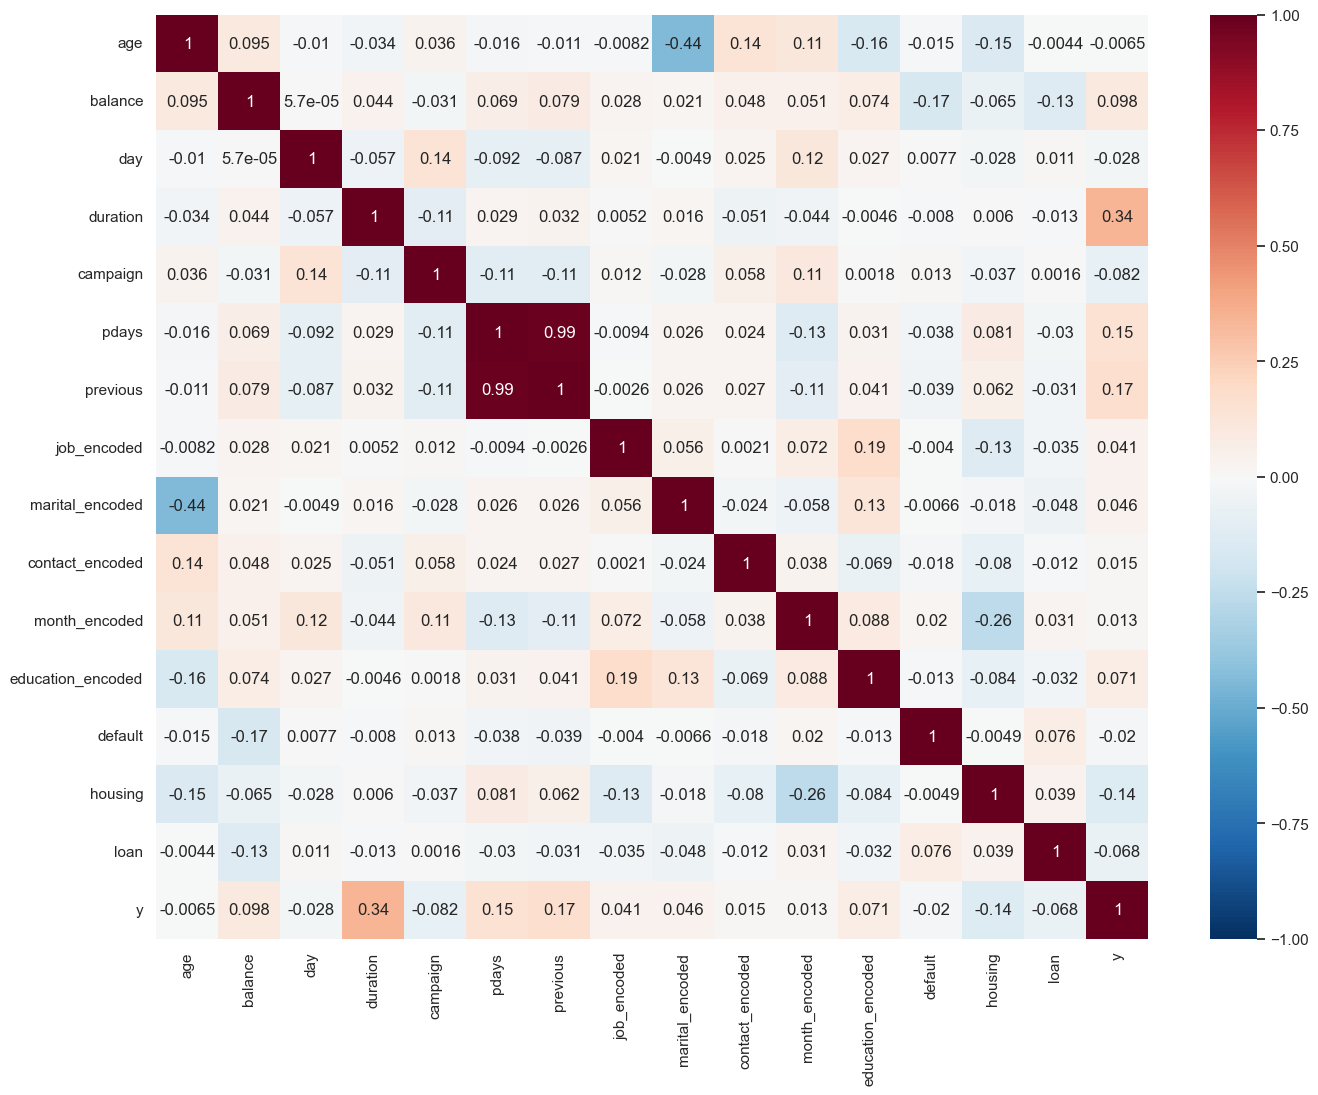

In [106]:
selected_cols= df.columns.drop(['job', 'marital', 'education', 'contact', 'month'])
df_encoded = df[selected_cols]
corr = df_encoded.corr(method='spearman')
sns.set(font_scale=1)
plt.figure(figsize=(16,12))
sns_plot = sns.heatmap(
    corr,        
    cmap='RdBu_r', 
    annot=True, 
    vmin=-1, vmax=1
);

In [107]:
(df == 'unknown').sum()

age                    0
job                  326
marital                0
education              0
balance                0
contact                0
day                    0
month                  0
duration               0
campaign               0
pdays                  0
previous               0
job_encoded            0
marital_encoded        0
contact_encoded        0
month_encoded          0
education_encoded      0
default                0
housing                0
loan                   0
y                      0
dtype: int64

A very small percent of the total rows has job as unknown so we can drop the rows 

In [108]:
(df == 'unknown').sum()

age                    0
job                  326
marital                0
education              0
balance                0
contact                0
day                    0
month                  0
duration               0
campaign               0
pdays                  0
previous               0
job_encoded            0
marital_encoded        0
contact_encoded        0
month_encoded          0
education_encoded      0
default                0
housing                0
loan                   0
y                      0
dtype: int64

## Visualizations

Overwiew of how values are spread out for each feature

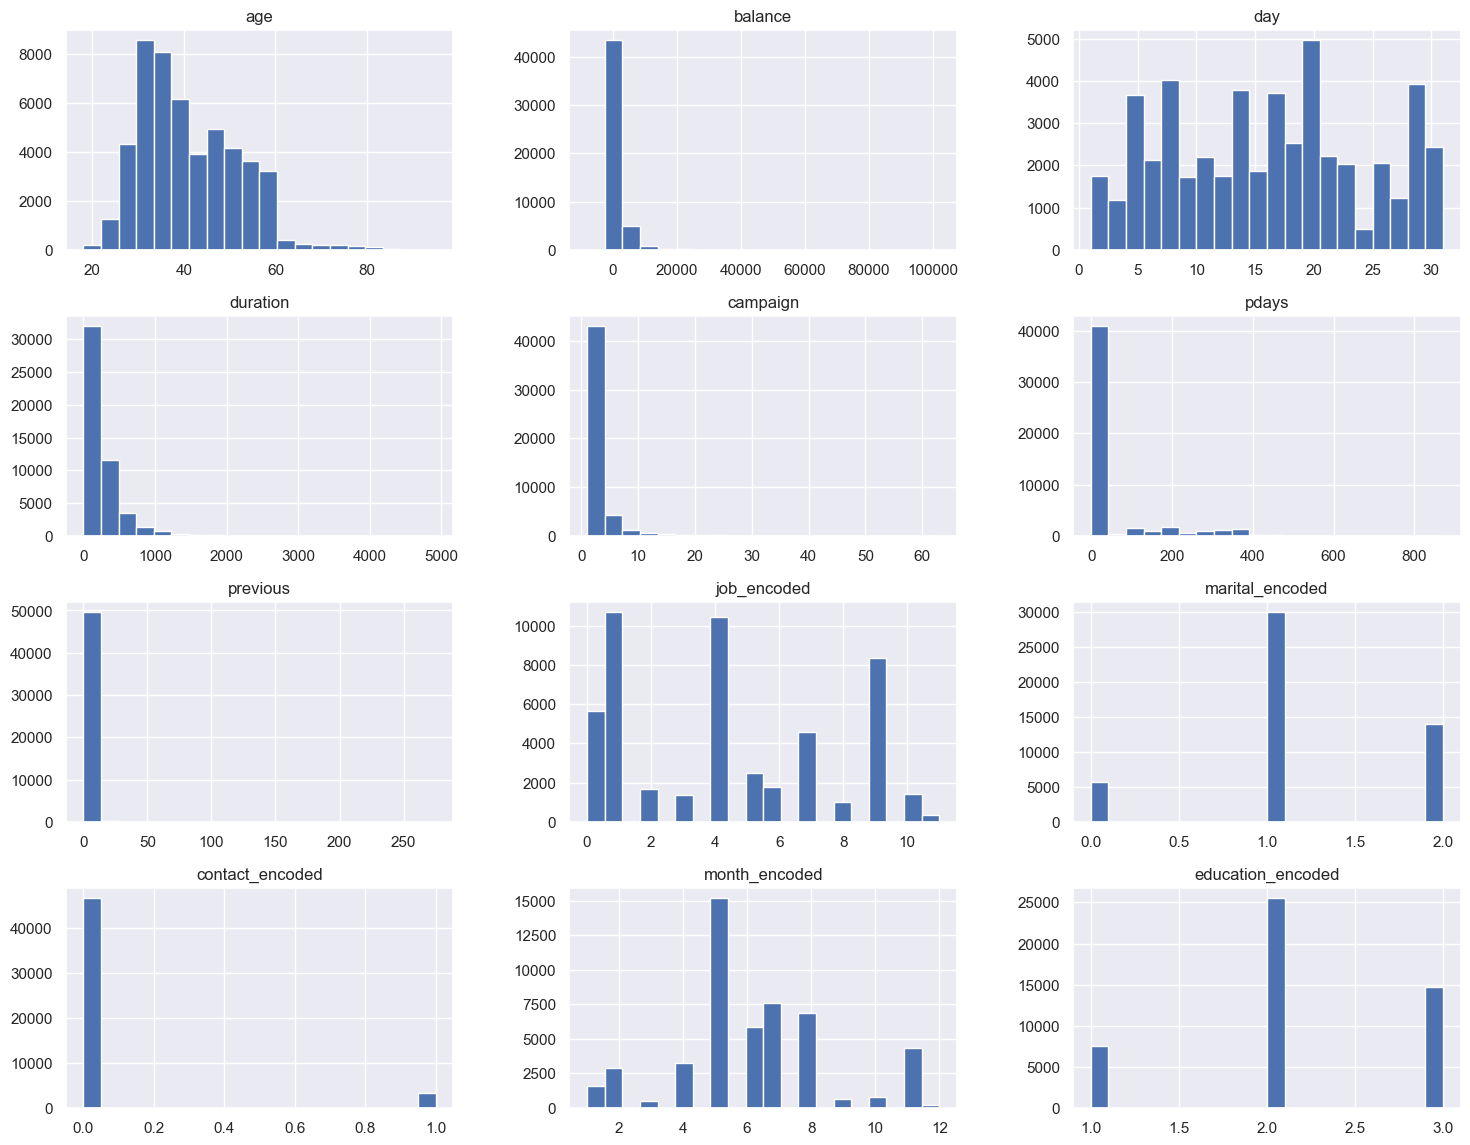

In [109]:
df.hist(bins=20, figsize=(18, 14))
plt.show()

Bar chart of the Frequency of Job Types. Blue collar, management, and technician have the highest job type frequency.

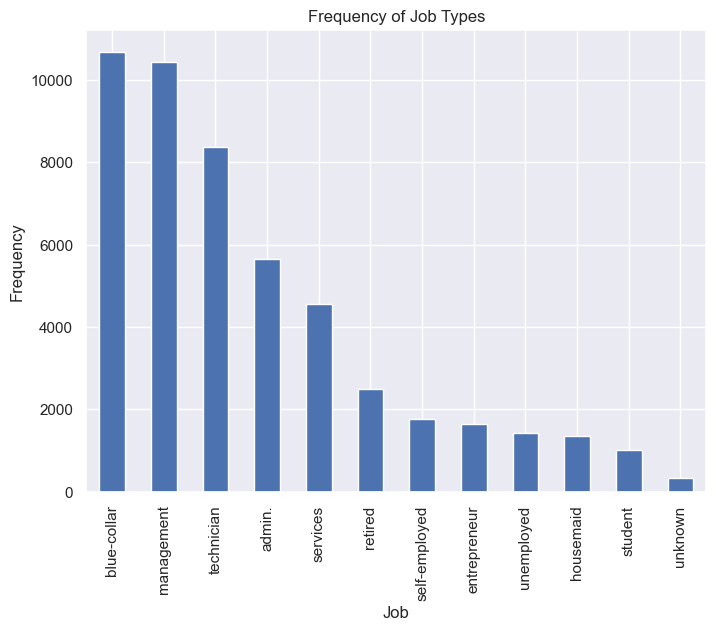

In [110]:

category_counts = df['job'].value_counts()

plt.figure(figsize=(8, 6))
category_counts.plot(kind='bar')
plt.title('Frequency of Job Types')
plt.xlabel('Job')
plt.ylabel('Frequency')
plt.show()

Bar chart of the Frequency of Marital Status. Most of the potential clients are married. 

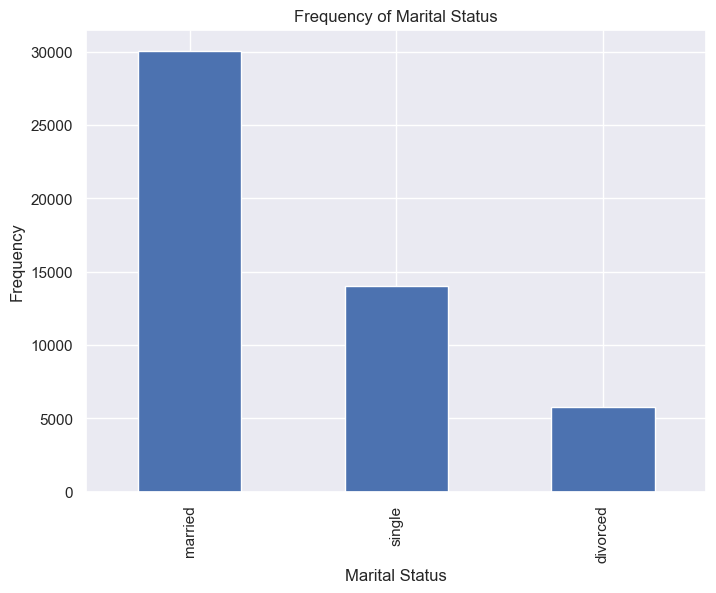

In [111]:
category_counts = df['marital'].value_counts()

plt.figure(figsize=(8, 6))
category_counts.plot(kind='bar')
plt.title('Frequency of Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Frequency')
plt.show()

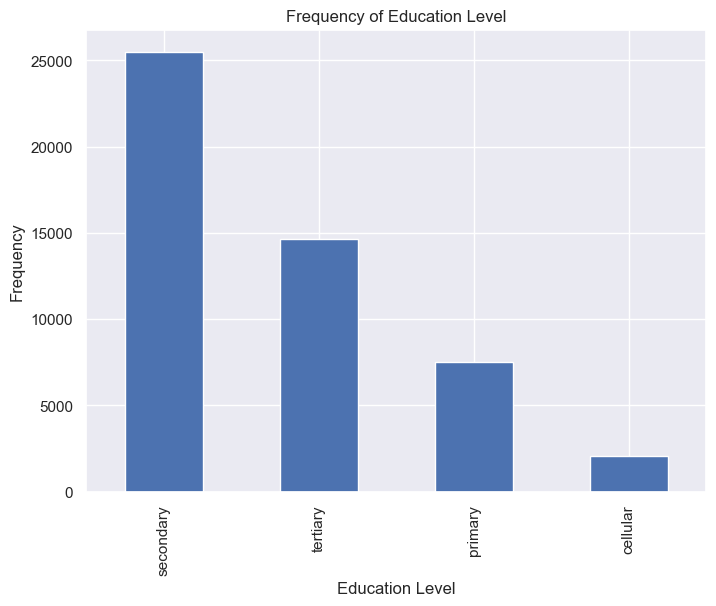

In [112]:
category_counts = df['education'].value_counts()

plt.figure(figsize=(8, 6))
category_counts.plot(kind='bar')
plt.title('Frequency of Education Level')
plt.xlabel('Education Level')
plt.ylabel('Frequency')
plt.show()

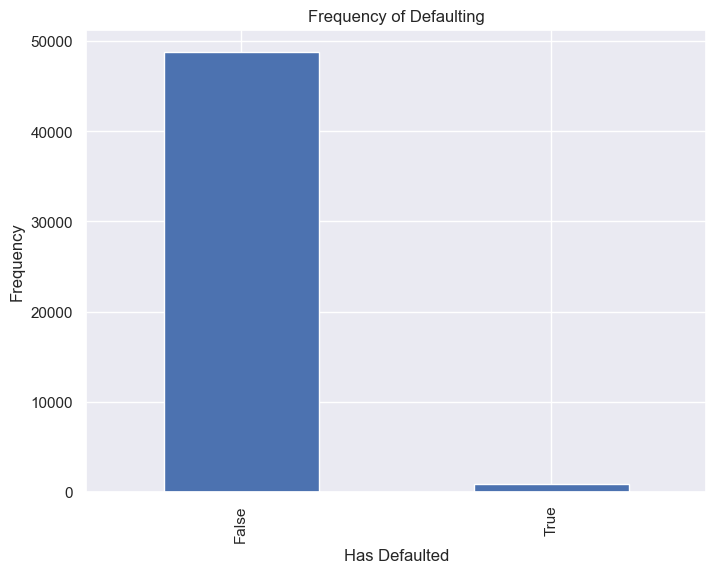

In [113]:
category_counts = df['default'].value_counts()

plt.figure(figsize=(8, 6))
category_counts.plot(kind='bar')
plt.title('Frequency of Defaulting')
plt.xlabel('Has Defaulted')
plt.ylabel('Frequency')
plt.show()

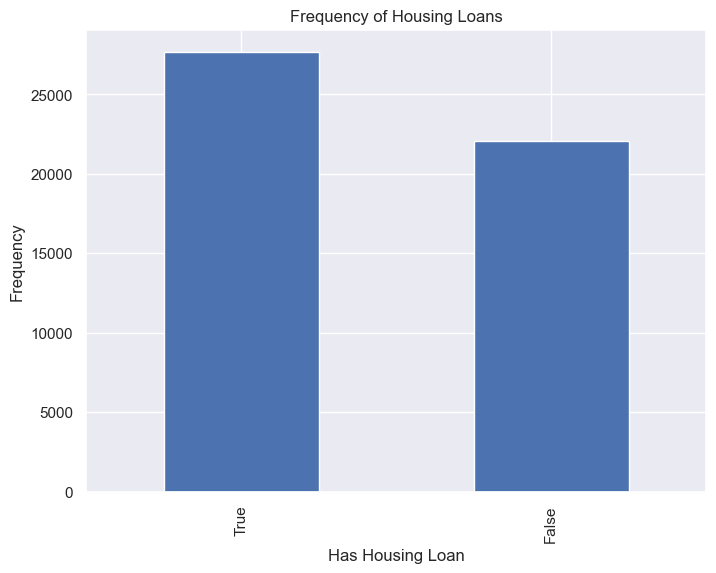

In [114]:
category_counts = df['housing'].value_counts()

plt.figure(figsize=(8, 6))
category_counts.plot(kind='bar')
plt.title('Frequency of Housing Loans')
plt.xlabel('Has Housing Loan')
plt.ylabel('Frequency')
plt.show()

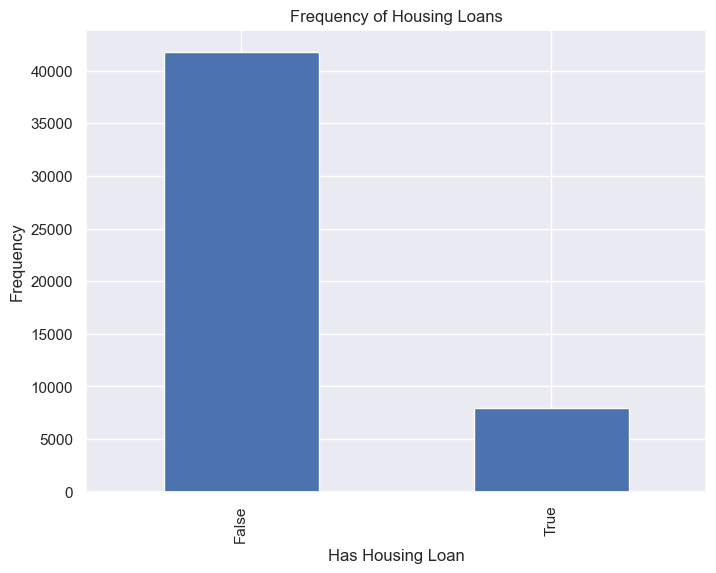

In [115]:
category_counts = df['loan'].value_counts()

plt.figure(figsize=(8, 6))
category_counts.plot(kind='bar')
plt.title('Frequency of Housing Loans')
plt.xlabel('Has Housing Loan')
plt.ylabel('Frequency')
plt.show()

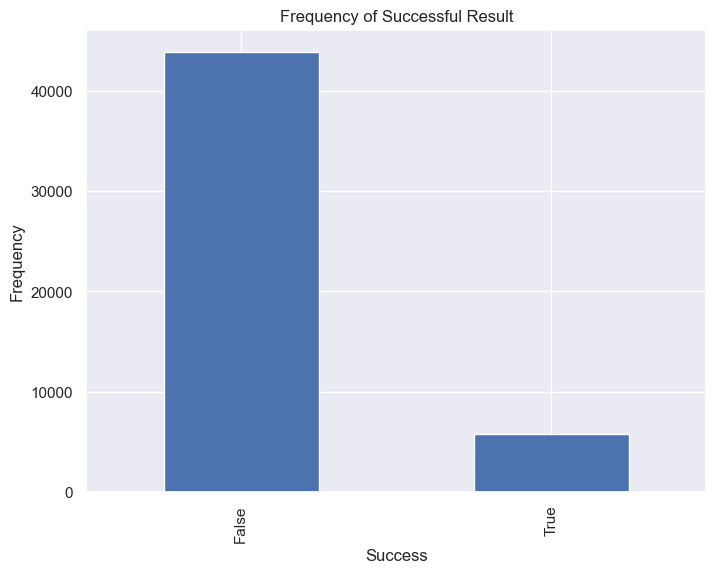

In [116]:
category_counts = df['y'].value_counts()

plt.figure(figsize=(8, 6))
category_counts.plot(kind='bar')
plt.title('Frequency of Successful Result')
plt.xlabel('Success')
plt.ylabel('Frequency')
plt.show()

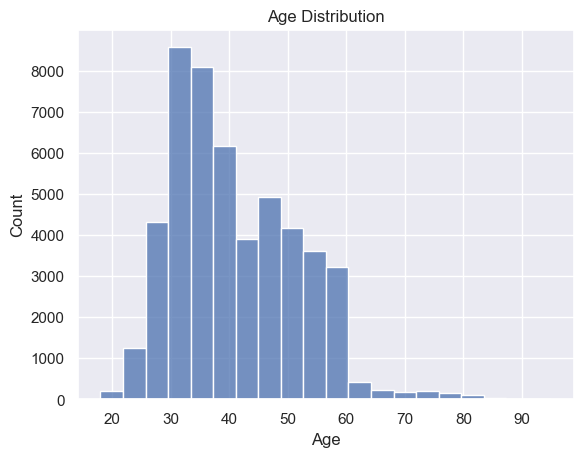

In [117]:

sns.histplot(df['age'], bins=20)
plt.xlabel('Age')
plt.title('Age Distribution')
plt.show()

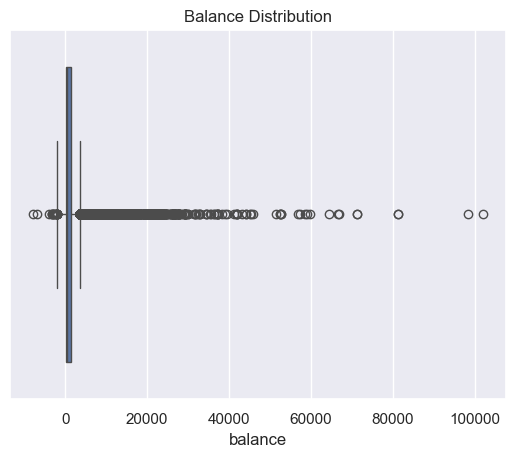

In [118]:
sns.boxplot(x=df['balance'])
plt.title('Balance Distribution')
plt.show()

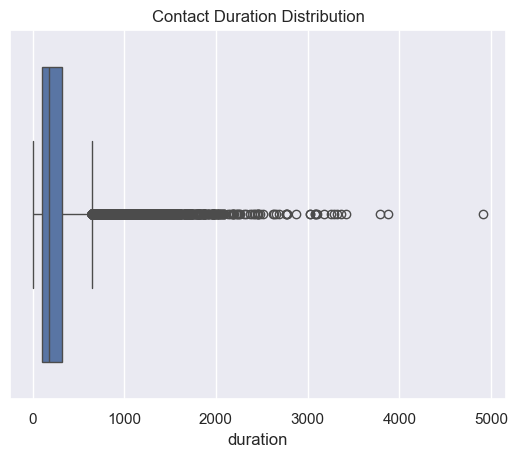

In [119]:
sns.boxplot(x=df['duration'])
plt.title('Contact Duration Distribution')
plt.show()

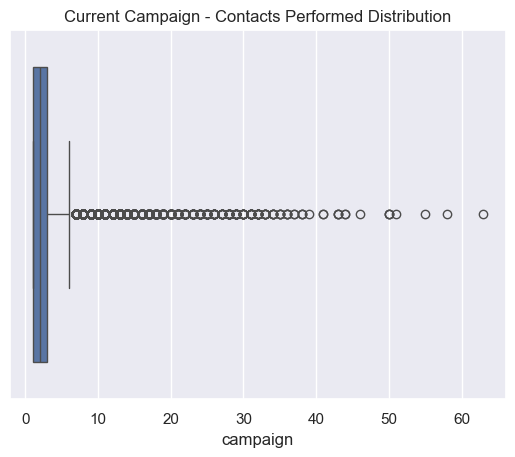

In [120]:
sns.boxplot(x=df['campaign'])
plt.title('Current Campaign - Contacts Performed Distribution')
plt.show()

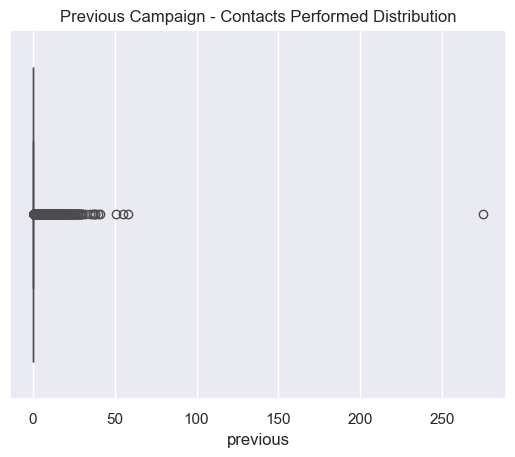

In [121]:
sns.boxplot(x=df['previous'])
plt.title('Previous Campaign - Contacts Performed Distribution')
plt.show()

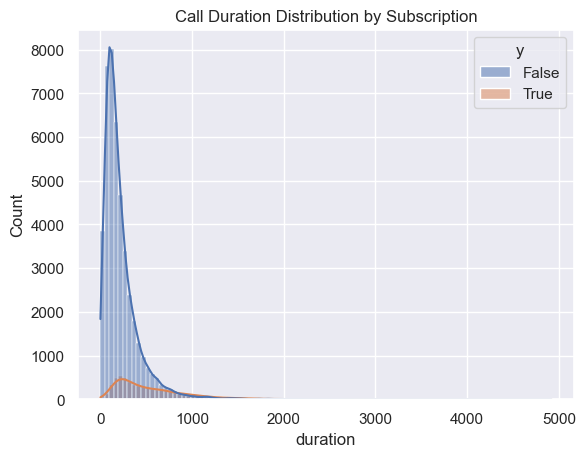

In [122]:
sns.histplot(data=df, x='duration', hue='y', bins=100, kde=True)
plt.title('Call Duration Distribution by Subscription')
plt.show()


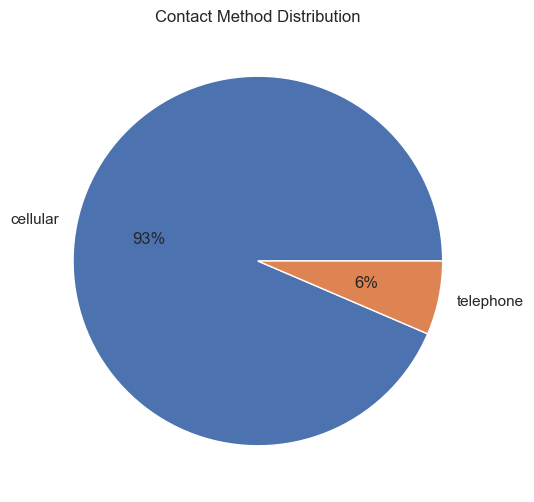

In [123]:
df['contact'].value_counts().plot.pie(autopct='%1d%%', figsize=(6, 6))
plt.title('Contact Method Distribution')
plt.ylabel('')
plt.show()


Heatmap to find see coorelation between different features and our target

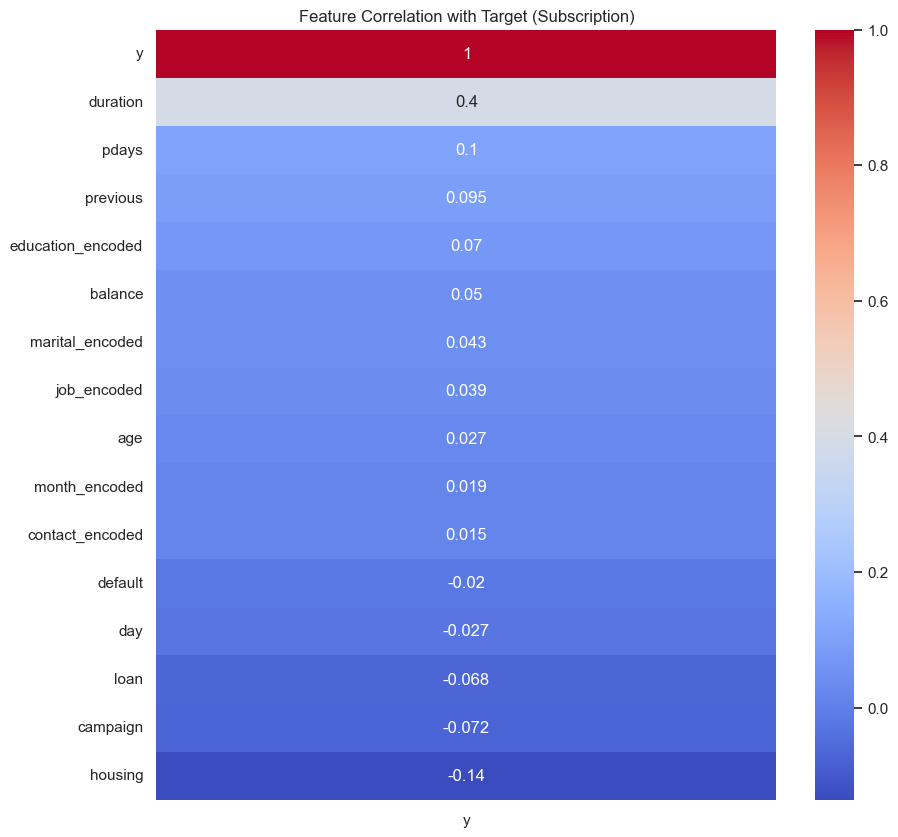

In [125]:
corr = df_encoded.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr[['y']].sort_values(by='y', ascending=False), annot=True, cmap='coolwarm')
plt.title('Feature Correlation with Target (Subscription)')
plt.show()


## Feature Engineering:

Split months into seasons to understand the rate of conversion by season

In [ ]:
def month_to_season(month):
    if month in [12, 1, 2]:
        return 'winter'
    elif month in [3, 4, 5]:
        return 'spring'
    elif month in [6, 7, 8]:
        return 'summer'
    else:
        return 'fall'

df['season'] = df['month_encoded'].apply(month_to_season)


Split duration of calls into categories to see how it affects rate of conversion and marketing strategy

In [ ]:
def call_duration_category(duration):
    if duration < 100:
        return 'short'
    elif duration < 300:
        return 'medium'
    else:
        return 'long'

df['call_length'] = df['duration'].apply(call_duration_category)


In [ ]:
df

## Model 1: 

## Model 2:

## Final Comparisons